# EDA Notebook

## Module import

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np #for numerical computations 
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns  # Import the Seaborn library for statistical data visualization

import os #for interacting with the operating system
from PIL import Image# Import PIL (Python Imaging Library) for working with images

import warnings # Suppress warnings using the warnings library 
warnings.filterwarnings("ignore")

---
### 1. Load dataset and Combine the two dataframes.

In [2]:
# Define filenames
base_furniture_file = "furniture_data.csv"
sliding_furniture_file = "furniture_sliding_data.csv"

# Check if files exist
if not (os.path.exists(base_furniture_file) and os.path.exists(sliding_furniture_file)):
    raise FileNotFoundError("One or both input CSV files are missing.")

# Load dataframes
base_furniture_df = pd.read_csv(base_furniture_file)
sliding_furniture_df = pd.read_csv(sliding_furniture_file)

# Check for consistent columns before concatenation
if base_furniture_df.columns.tolist() != sliding_furniture_df.columns.tolist():
    raise ValueError("Dataframes have inconsistent columns. Check the CSV files.")

# Concatenate dataframes
full_furniture_df = pd.concat([base_furniture_df, sliding_furniture_df], axis=0)

### 2. Raw Data Overview

In [3]:
print("\n--- Checking for Imbalanced Data (Furniture_Category) ---\n")

category_counts = base_furniture_df['Furniture_Category'].value_counts()
print("Value Counts:\n", category_counts)


--- Checking for Imbalanced Data (Furniture_Category) ---

Value Counts:
 Furniture_Category
lamps       32402
chairs      22053
tables      17100
dressers     7871
beds         6578
sofas        4080
Name: count, dtype: int64


In [4]:
#Calculate Class Proportions
category_proportions = category_counts / len(base_furniture_df)
print("\nClass Proportions:\n", category_proportions)


Class Proportions:
 Furniture_Category
lamps       0.359687
chairs      0.244805
tables      0.189823
dressers    0.087374
beds        0.073021
sofas       0.045291
Name: count, dtype: float64


### Visualize Raw Data Class Distribution:

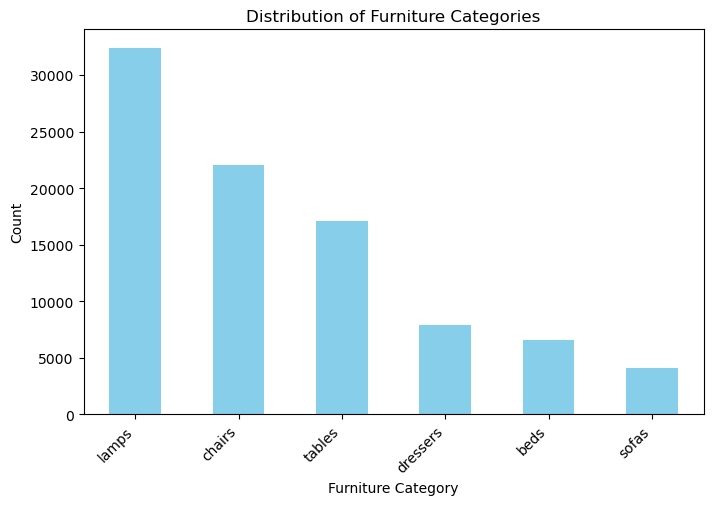

In [5]:
plt.figure(figsize=(8, 5))# Create a figure for the plot with a specific size 
category_counts.plot.bar(color='skyblue')# color argument sets the bar color to sky blue
plt.title('Distribution of Furniture Categories')# Add a title to the plot

# Label the x-axis (horizontal axis) and y-axis (vertical axis)
plt.xlabel('Furniture Category')
plt.ylabel('Count')

# Rotate x-axis tick labels for better readability if there are many categories
plt.xticks(rotation=45, ha='right')# Rotate x-axis labels for better visibility
# Display the plot
plt.show()

---
### 3. Sliding Data Overview

#### Data shape

In [6]:
print("Shape of the combined dataframe:", full_furniture_df.shape)# Print dataframe shape

Shape of the combined dataframe: (442308, 3)


#### Analyze furniture category.

In [7]:
print("\n--- Furniture Category Analysis ---\n")
category_counts = full_furniture_df['Furniture_Category'].value_counts()# Count the value of category of furniture
print("Value counts for Furniture_Category:\n", category_counts)


--- Furniture Category Analysis ---

Value counts for Furniture_Category:
 Furniture_Category
chairs      80415
sofas       80012
dressers    77193
beds        75159
tables      72155
lamps       57374
Name: count, dtype: int64


### Sliding Data visualisation

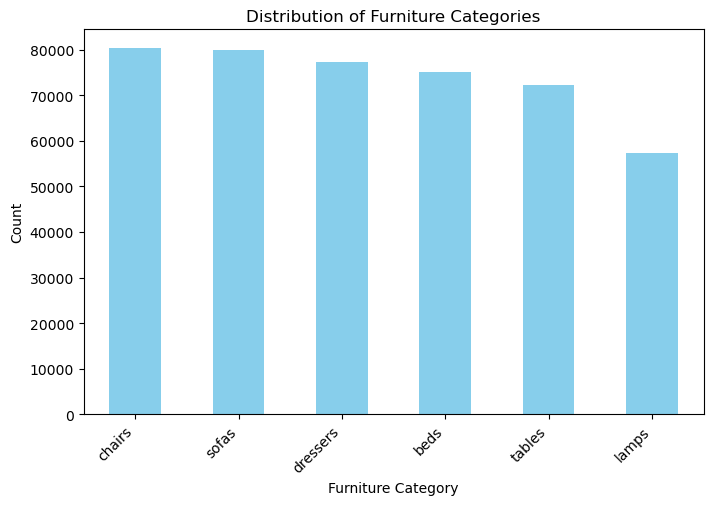

In [8]:
plt.figure(figsize=(8, 5)) # Adjust figure size if needed
category_counts.plot.bar(color='skyblue')# color argument sets the bar color to sky blue
plt.title('Distribution of Furniture Categories')# Add a title to the plot

# Label the x-axis (horizontal axis) and y-axis (vertical axis)
plt.xlabel('Furniture Category')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
# Display the plot
plt.show()

### 4. Analyze furniture type.

In [9]:
print("\n--- Furniture Type Analysis ---\n")
type_counts = full_furniture_df['Furniture_Type'].value_counts()# Count the furniture type value
print("Value counts for Furniture_Type:\n", type_counts)


--- Furniture Type Analysis ---

Value counts for Furniture_Type:
 Furniture_Type
Scandinavian     30801
Southwestern     30687
Eclectic         30245
Rustic           29454
Tropical         29057
Craftsman        27938
Beach            27858
Asian            27137
Mediterranean    26587
Victorian        26284
Midcentury       25648
Industrial       25471
Farmhouse        24761
Traditional      21847
Modern           21424
Transitional     19504
Contemporary     17605
Name: count, dtype: int64


### Furniture Types Visualisation

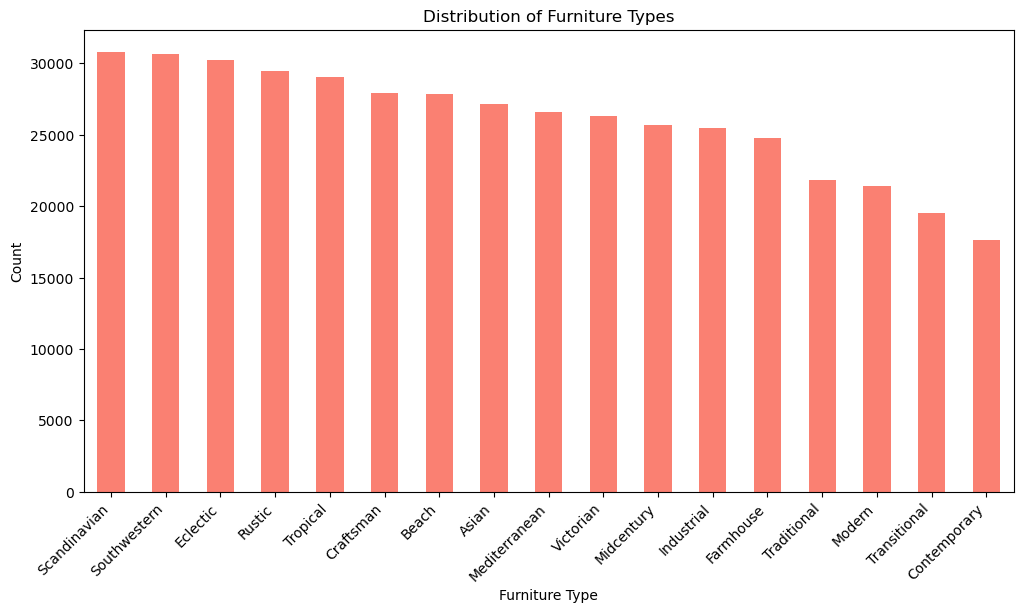

In [10]:
plt.figure(figsize=(12, 6)) # Adjust figure size if needed
type_counts.plot.bar(color='salmon')# color argument sets the bar color to salmon
plt.title('Distribution of Furniture Types')# Add a title to the plot

# Label the x-axis (horizontal axis) and y-axis (vertical axis)
plt.xlabel('Furniture Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
# Display plot
plt.show()

---
### 5. Analyze relationship between category and type.

In [11]:
print("\n--- Relationship between Category and Type ---\n")
category_type_counts = full_furniture_df.groupby('Furniture_Category')['Furniture_Type'].value_counts()# Count the value of each furniture type in each category
print(category_type_counts)


--- Relationship between Category and Type ---

Furniture_Category  Furniture_Type
beds                Victorian         5229
                    Farmhouse         5187
                    Southwestern      5145
                    Beach             5101
                    Asian             5044
                                      ... 
tables              Contemporary      3177
                    Industrial        2661
                    Modern            2272
                    Farmhouse         1279
                    Midcentury        1194
Name: count, Length: 102, dtype: int64


### The visualisation data of relationship of category and type  
#### Stacked Bar Chart

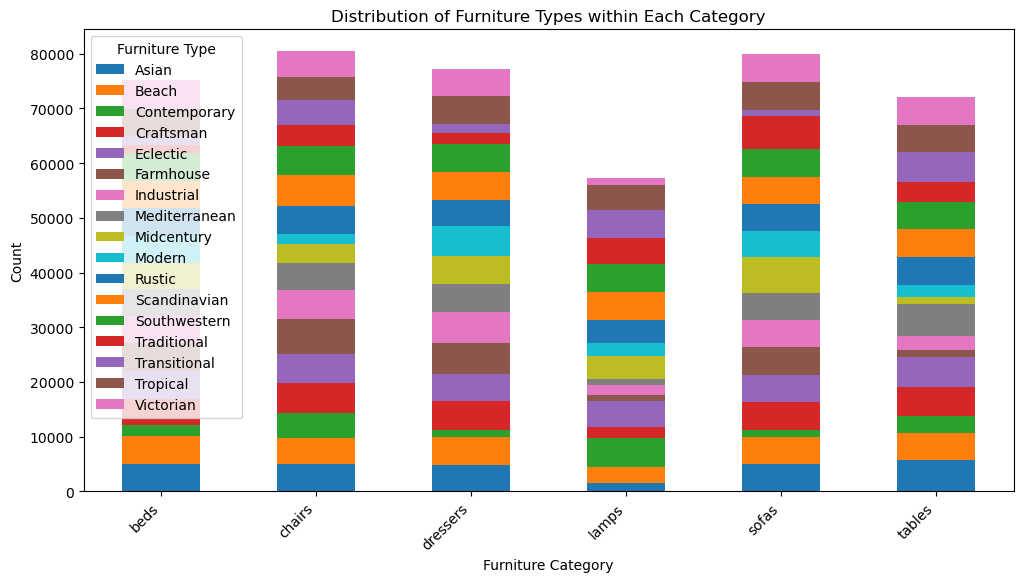

In [12]:
category_type_df = category_type_counts.unstack(fill_value=0)# Reshape the DataFrame for plotting. Fill missing combinations with 0.

# Create a stacked bar plot
category_type_df.plot(kind='bar', stacked=True, figsize=(12, 6))
# kind='bar': Specifies a bar chart
# stacked=True: Stacks bars for each category on top of each other
# figsize=(12, 6): Sets the width and height of the figure

plt.title('Distribution of Furniture Types within Each Category')# Set the plot title
# Set the x-axis label and y-axis label
plt.xlabel('Furniture Category')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')# Rotate x-axis labels for better visibility
plt.legend(title='Furniture Type')# Add a legend to distinguish furniture types
plt.show()# Display the plot

### Heatmap

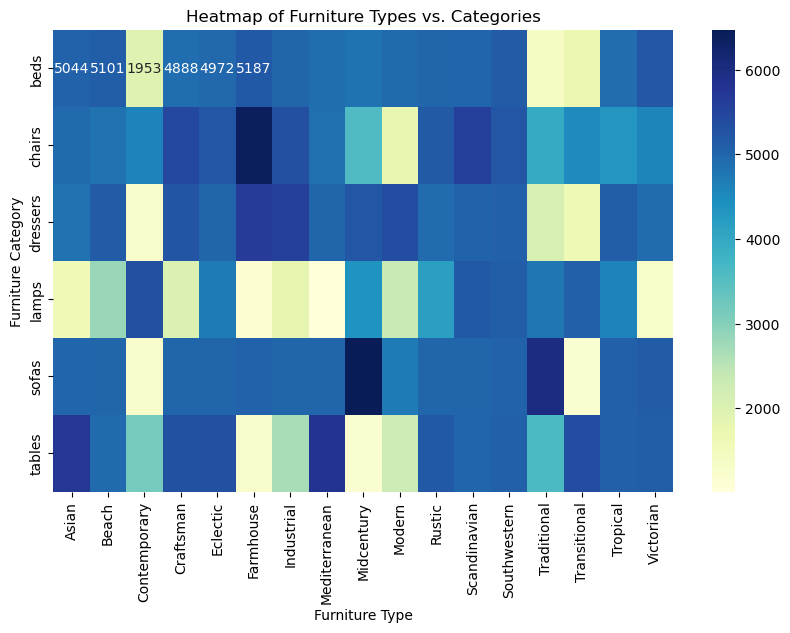

In [13]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))# Sets the width to 10 inches and height to 6 inches
# Generate a heatmap using Seaborn
sns.heatmap(category_type_df, annot=True, fmt="d", cmap="YlGnBu")
# category_type_df: The DataFrame containing the data for the heatmap
    # annot=True: Displays the values within each cell of the heatmap
    # fmt="d": Formats the annotations as integers (whole numbers)
    # cmap="YlGnBu": Uses the yellow-green-blue colormap for visualization 

plt.title('Heatmap of Furniture Types vs. Categories')# Set the title of the heatmap
# Set the x-axis label and y-axis label
plt.xlabel('Furniture Type')
plt.ylabel('Furniture Category')
plt.show()# Display the plot

---
### 7. Image Visualisation

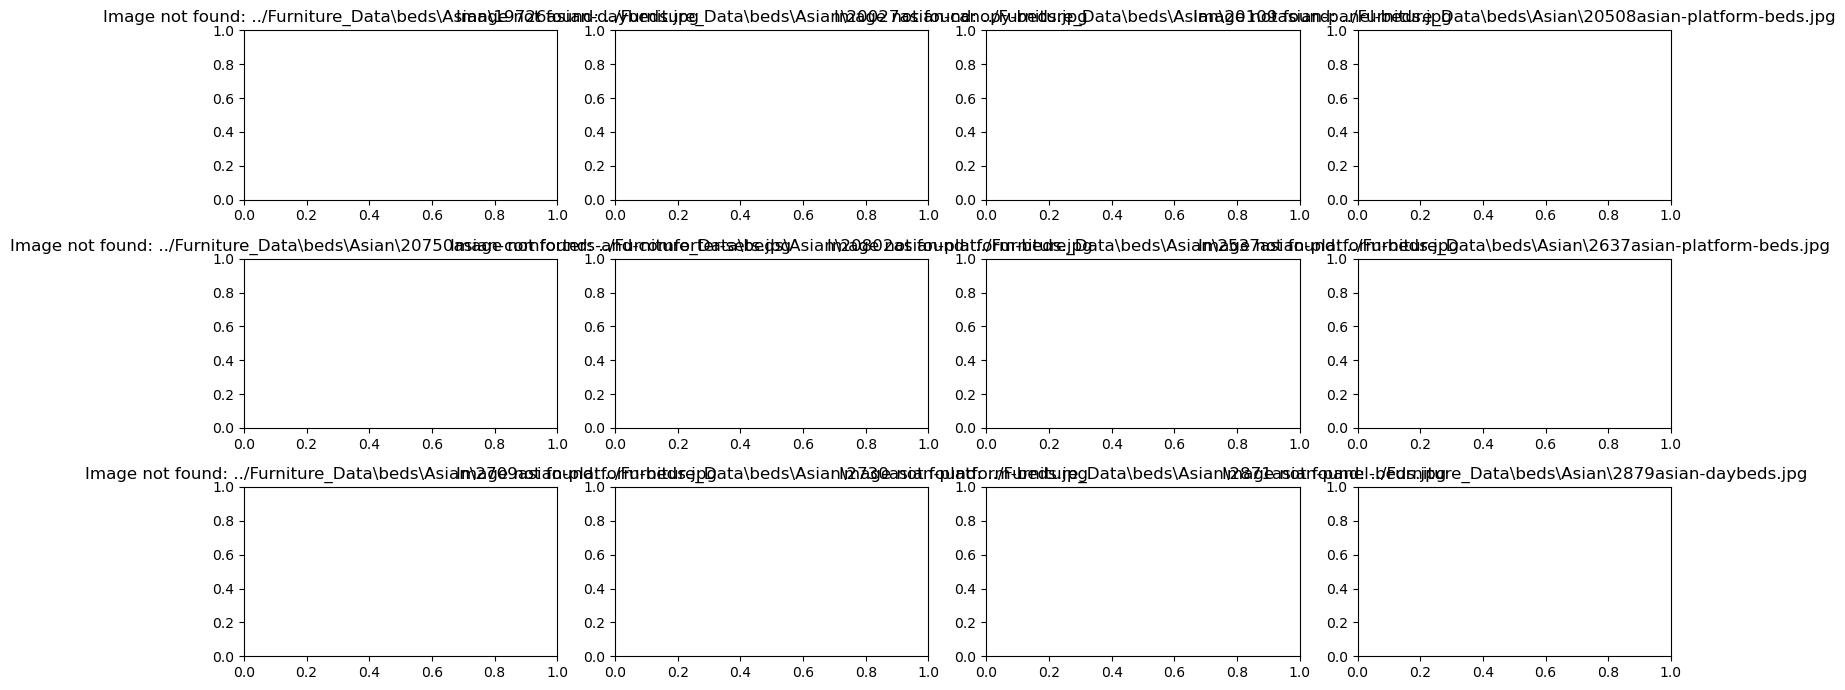

In [14]:



# Function to display furniture images with dimensions
def display_furniture_images(df, num_rows=2, num_cols=5, figsize=(15, 7), max_width=200): 
    """
    Displays furniture images from a DataFrame with their dimensions.

    Args:
        df (pd.DataFrame): DataFrame containing 'Image_Path' and 'Furniture_Category' columns.
        num_rows (int): Number of rows in the subplot grid.
        num_cols (int): Number of columns in the subplot grid.
        figsize (tuple): Figure size for the plot.
        max_width (int): Maximum width (in pixels) for resizing the images.
    """

       # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)

    # Loop through each subplot 
    for i, ax in enumerate(axes.flat): # axes.flat iterates over all subplots in a flattened way
        if i < len(df): # Check if we are within the DataFrame's length
            image_path = df.loc[i, "Image_Path"]# Get the image path from the DataFrame

            # Check if the image file exists
            if os.path.exists(image_path): 
                furniture_image = Image.open(image_path)# Open the image
                
                # Resize image if necessary
                width, height = furniture_image.size
                if width > max_width:
                    furniture_image.thumbnail((max_width, max_width * height // width)) 
                     # thumbnail() resizes the image in-place while maintaining aspect ratio

                # Display the image in the subplot
                ax.imshow(furniture_image)
                ax.set_title(f"{df.loc[i, 'Furniture_Category']}: {width} x {height}") # Set the subplot title with furniture category and original dimensions
            else:
                 # Display "Image not found" if the file doesn't exist
                ax.set_title(f"Image not found: {image_path}")
        else:
            # Turn off the axis for any unused subplots
            ax.axis('off') # Hide unused subplots

     # Adjust subplot spacing for a better layout
    plt.tight_layout()
    # Display the plot with image
    plt.show()

# Example usage:
display_furniture_images(base_furniture_df, num_rows=3, num_cols=4, max_width=300)

# The End of EDA Notebook.